## [OpenCV Documentation](https://docs.opencv.org/4.x/da/d6e/tutorial_py_geometric_transformations.html)

In [1]:
# IMAGE TRANSFORMATION 

import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('franklin.jpg')

In [3]:
height, width = img.shape[:2]

### Scaling or Resizing

OpenCV `.resize()` function used for scaling.
- specify scaling factor: `cv2.resize(image, None, fx, fy, interpolation)`
- manually specify size:   `cv2.resize(image, (width, height), interpolation)`

Interpolation Methods:
- `cv2.INTER_AREA` for shrinking
-  `cv2.INTER_CUBIC` & `cv2.INTER_LINEAR` for zooming

In [4]:
shrinked = cv2.resize(img, (0,0), fx = 0.5, fy = 0.5)
zoomed =  cv2.resize(img, (2*width, 2*height))

In [5]:
print(f"Shape of Original Image: {img.shape}")
print(f"Shape of Shrunken Image: {shrinked.shape}")
print(f"Shape of Zoomed Image: {zoomed.shape}")

Shape of Original Image: (4032, 3024, 3)
Shape of Shrunken Image: (2016, 1512, 3)
Shape of Zoomed Image: (8064, 6048, 3)


### Translation

Translation shifts an objects location. 

If the shift in the (x,y) direction is known and described as (tx, ty):
The Transformation Matrix **M**

        M = [1 0 tx]
            [0 1 ty]

The matrix is passed into the `cv.warpAffine(image, M, (cols, rows))` function

In [6]:
# Shift an image by (1000, 500)
M = np.float32([[1, 0, 1000], [0, 1, 500]])

transl = cv2.warpAffine(img, M, (width, height))

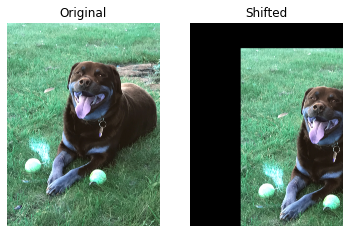

In [7]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.axis("off")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Shifted")
plt.axis("off")
plt.imshow(transl)

### Rotation
The rotation of an image for angle θ is achieved by M of the form:

            M = [cosθ  -sinθ]
                [sinθ   cosθ]
                
OpenCV provides a scaled rotation with adjustable center of rotation to rotate at any location. The modified M:

            M = [ ⍺  β  (1-⍺)⋅center.x-β⋅center.y]
                [-β  ⍺  β⋅center.x+(1-⍺)⋅center.y]
                
              where ⍺ = scale ⋅ cosθ
                    β = scale ⋅ sinθ
                    
The function `cv2.getRotationMatrix2D(center, angle, scale)` finds the modified transformation matrix

In [8]:
# Rotate Image 90 degrees with respect to the center, no scaling:
center = ((width-1)/2.0, (height-1)/2.0)
MM = cv2.getRotationMatrix2D(center, 90, 1)
rot = cv2.warpAffine(img, MM, (width, height))

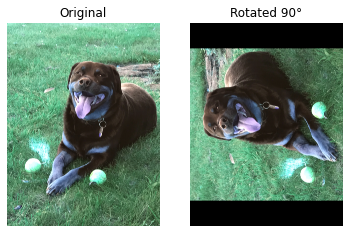

In [9]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.axis("off")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Rotated 90°")
plt.axis("off")
plt.imshow(rot)

### Affine Transformation

In Affine Transformation, all parallel lines in the original image stay parallel in the output image. 

To find the transformation matrix, define three points from input to the corresponding location in the output image.

`cv.getAffineTransform(pts1, pts2)` will create a 2x3 matrix with these points.

            [x']                [x]
            [  ] = map_matrix ⋅ [y]
            [y']                [1]
            
            where: dst(i) = (x', y'), src(i) = (x, y), i = 0, 1, 2

Coordinates of triangle vertices in the source image correspond to the triangle vertices in the destination image.

In [10]:
pts1 = np.float32([ [500, 500], [2000, 500], [500, 2000] ])
pts2 = np.float32([ [100, 1000], [2000, 500], [1000, 2500] ])

AM = cv2.getAffineTransform(pts1, pts2)
aft = cv2.warpAffine(img, AM, (width, height))

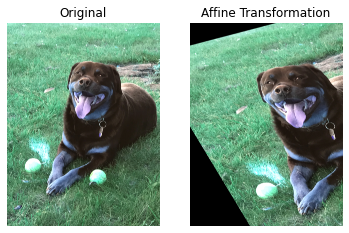

In [11]:
plt.subplot(1, 2, 1)
plt.title("Original")
plt.axis("off")
plt.imshow(img)

plt.subplot(1, 2, 2)
plt.title("Affine Transformation")
plt.axis("off")
plt.imshow(aft)

In [12]:
# Saving Affine Image:
cv2.imwrite('affineFrank.jpg', aft)

True

### Perspective Transformation

Straight lines remain straight after perspective transformation.

This transformation uses a 3x3 matrix and 4 coordinate points, corresponding points on the output image. 3 of the 4 points shouldn't be collinear.

`cv2.getPerspectiveTransformation()`